# Heart Disease Prediction

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Attribute Information

- Age: age of the patient (years)
- Sex: sex of the patient (M: Male, F: Female)
- ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- RestingBP: resting blood pressure (mm Hg)
- Cholesterol: serum cholesterol (mm/dl) | Reference ranges (same for M/F): <200 mg/dL = normal, 200-239 mg/dL = borderline high, and >=240 mg/dL = high
- FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
- ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
- Oldpeak: oldpeak = ST (Numeric value measured in depression)
- ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- HeartDisease: output class (1: heart disease, 0: Normal)

Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import model_selection, metrics

In [2]:
data = pd.read_csv('C:/Users/Edward/Documents/DS Projects/Heart Disease Prediction/Heart Disease Prediction/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis

In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##### Exploring Age Distributions

C:\DS\Conda\envs\trial1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

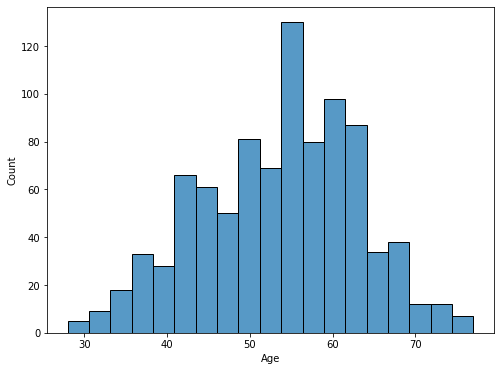

In [4]:
plt.figure(figsize = (8, 6))
sns.histplot(data=data, x="Age")

<function matplotlib.pyplot.show(close=None, block=None)>

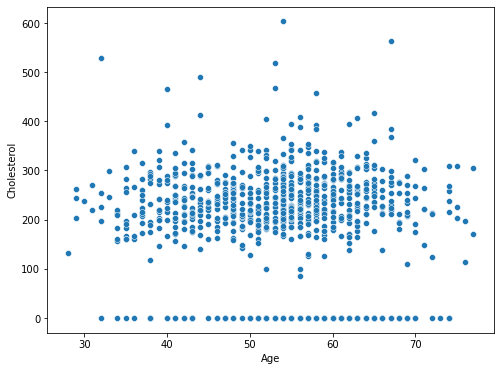

In [5]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=data, x='Age', y='Cholesterol')
plt.show

It appears there are multiple entries where the cholesterol is 0 mm/dl. Since this is biologically impossible, it means the cholesterol levels were not recorded for those participants. This could prove problematic when building a model so the 0 cholesterol values have to be removed. There are also some very high outliers which have to be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

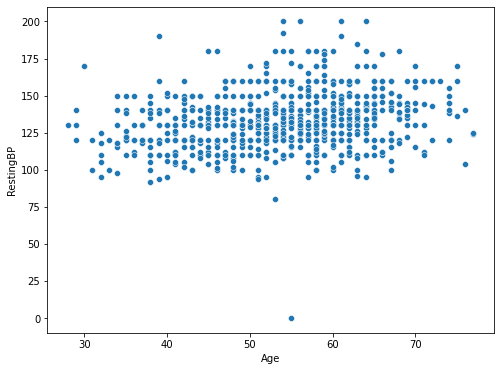

In [6]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=data, x='Age', y='RestingBP')
plt.show

There is a single 0 value for resting BP which is also not possible and will have to be removed.

In [7]:
trimmed_data = data.loc[(data['Cholesterol']!=0) & (data['Cholesterol']<425) & (data['RestingBP']>0)]
trimmed_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,52.911924,133.098916,241.735772,0.165312,140.353659,0.905149,0.475610
std,9.492643,17.326139,52.217184,0.371714,24.484057,1.076290,0.499743
min,28.000000,92.000000,85.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,236.500000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,274.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,417.000000,1.000000,202.000000,6.200000,1.000000


##### Exploring Distibutions by Sex

<Axes: xlabel='Sex', ylabel='count'>

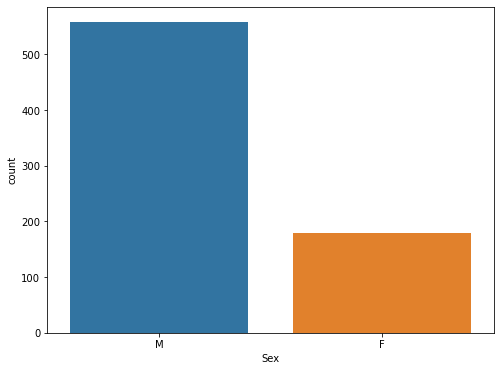

In [8]:
plt.figure(figsize = (8, 6))
sns.countplot(data=trimmed_data, x="Sex")

There are over 3x more males in the dataset than females. Most of the features being assessed do not vary much by sex, however, it's prudent to dig in a bit deeper to verify that central tendencies and distributions are similar.

In [9]:
males = trimmed_data.loc[trimmed_data['Sex']=='M']
males.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,53.170251,133.396057,238.139785,0.184588,138.197133,0.983333,0.557348
std,9.539752,16.902799,50.251059,0.388311,24.866766,1.100379,0.497146
min,28.000000,92.000000,85.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,234.000000,0.000000,140.000000,0.800000,1.000000
75%,59.000000,140.000000,270.750000,0.000000,156.000000,1.800000,1.000000
max,77.000000,200.000000,412.000000,1.000000,202.000000,5.600000,1.000000


In [10]:
females = trimmed_data.loc[trimmed_data['Sex']=='F']
females.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,52.111111,132.177778,252.883333,0.105556,147.038889,0.662778,0.222222
std,9.325815,18.596616,56.599472,0.308125,22.013801,0.961030,0.416899
min,30.000000,94.000000,141.000000,0.000000,90.000000,0.000000,0.000000
25%,45.000000,120.000000,210.000000,0.000000,130.000000,0.000000,0.000000
50%,52.500000,130.000000,247.000000,0.000000,150.000000,0.000000,0.000000
75%,58.250000,140.000000,294.000000,0.000000,163.000000,1.000000,0.000000
max,76.000000,200.000000,417.000000,1.000000,192.000000,6.200000,1.000000


The mean values and SDs for both sexes look similar. Plotting some of the features should reveal their distributions.

<function matplotlib.pyplot.show(close=None, block=None)>

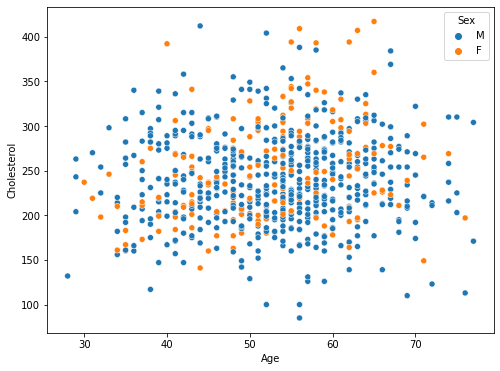

In [11]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=trimmed_data, x='Age', y='Cholesterol', hue = 'Sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

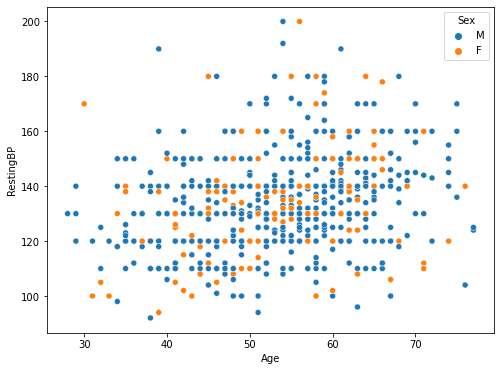

In [12]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=trimmed_data, x='Age', y='RestingBP', hue = 'Sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

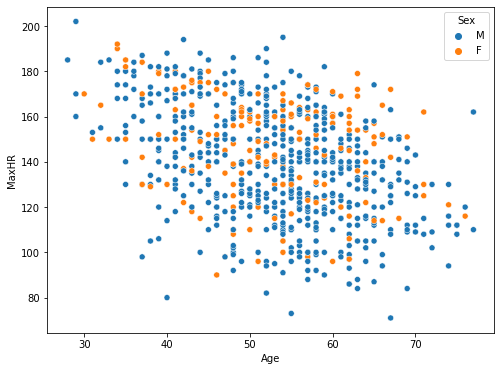

In [13]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=trimmed_data, x='Age', y='MaxHR', hue = 'Sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

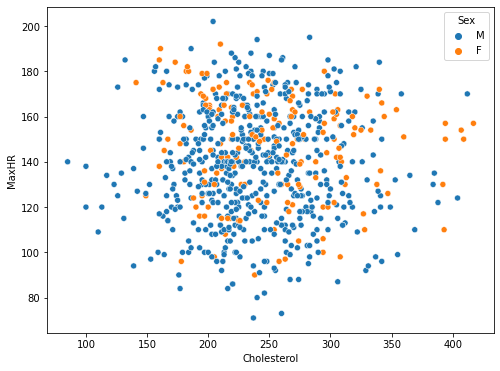

In [14]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=trimmed_data, x='Cholesterol', y='MaxHR', hue='Sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

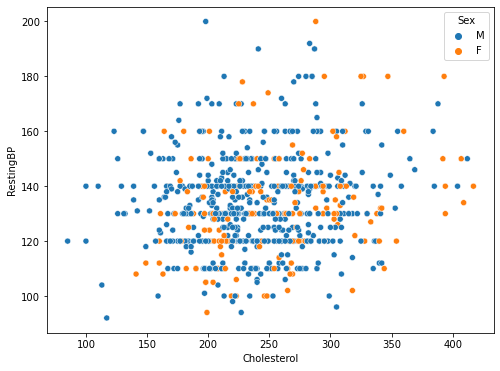

In [15]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=trimmed_data, x='Cholesterol', y='RestingBP', hue='Sex')
plt.show

In [16]:
def correlations_by_sex(sex):
    '''
    calculates Pearson's R (and p-value) using SciPy and loops over each sub list to combine them with f-strings
    '''
    cor_list = [stats.pearsonr(sex['Age'], sex['Cholesterol']),
            stats.pearsonr(sex['Age'], sex['RestingBP']),
            stats.pearsonr(sex['Age'], sex['MaxHR']),
            stats.pearsonr(sex['Cholesterol'], sex['MaxHR']),
            stats.pearsonr(sex['Cholesterol'], sex['RestingBP']),
            stats.pearsonr(sex['RestingBP'], sex['MaxHR'])]

    list = [f"R: {i[0]:.4f}, p: {i[1]:.4f}" for i in cor_list]
    
    return list


pearson_corr_list = ['Age/Cholesterol', 'Age/RestingBP', 'Age/MaxHR', 'Cholesterol/MaxHR', 'Cholesterol/RestingBP', 'RestingBP/MaxHR']

s_correlations = pd.DataFrame({'Correlation': pearson_corr_list,
                               'Males': correlations_by_sex(males),
                               'Females': correlations_by_sex(females)})

s_correlations.set_index('Correlation')

,Males,Females
Correlation,,
Age/Cholesterol,"R: 0.0082, p: 0.8469","R: 0.3126, p: 0.0000"
Age/RestingBP,"R: 0.2434, p: 0.0000","R: 0.3082, p: 0.0000"
Age/MaxHR,"R: -0.4139, p: 0.0000","R: -0.2833, p: 0.0001"
Cholesterol/MaxHR,"R: 0.0142, p: 0.7386","R: -0.1215, p: 0.1041"
Cholesterol/RestingBP,"R: 0.0886, p: 0.0364","R: 0.2584, p: 0.0005"
RestingBP/MaxHR,"R: -0.1455, p: 0.0006","R: -0.0559, p: 0.4564"


There appears to be significant differences in the correlations between features when split by sex. While these differences may  simply spurious, it is best to leave the 'Sex' feature in the dataset.

##### Exploration of Categorical Variables

In [17]:
pd.crosstab(trimmed_data['ExerciseAngina'], trimmed_data['RestingECG'])

RestingECG,LVH,Normal,ST
ExerciseAngina,,,
N,109,285,59
Y,66,153,66


In [18]:
pd.crosstab(trimmed_data['RestingECG'], trimmed_data['ChestPainType'])

ChestPainType,ASY,ATA,NAP,TA
RestingECG,,,,
LVH,96,23,42,14
Normal,196,118,104,20
ST,73,24,21,7


In [19]:
pd.crosstab(trimmed_data['ExerciseAngina'], trimmed_data['ChestPainType'])

ChestPainType,ASY,ATA,NAP,TA
ExerciseAngina,,,,
N,137,149,132,35
Y,228,16,35,6


## **Preprocessing/Encoding Data**

The following features in the dataframe are categoical

- Sex (Nominal/Binary)
- ChestPainType (Nominal)
- RestingECG (Nominal)
- ExerciseAngina (Ordinal/Binary)
- ST_Slope (Ordinal)

Fasting BS is technically binary but has already been encoded

To test various forms of the decision tree models to be built, one dataset will exclude all categorical variables, another will use label encoding for ordinal categorical variables and the last will combine the label encoded variables with one-hot encoding for the nomincal categorical variables.

#### **Dataframe 1 - Removing All Categorical Data for Sklearn**

In [20]:
test_df1 = trimmed_data.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
test_df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


#### Dateframe 2 - **Label Encoding Ordinal Categorical Data**

In [21]:
ang_mapping = {"N" : 0, "Y" : 1}
stslp_mapping = {"Down" : -1, "Flat" : 0, "Up" : 1}
test_df2 = trimmed_data.drop(columns=['Sex', 'ChestPainType', 'RestingECG'])
test_df2['ExerciseAngina'] = test_df2['ExerciseAngina'].map(ang_mapping)
test_df2['ST_Slope'] = test_df2['ST_Slope'].map(stslp_mapping)
test_df2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,140,289,0,172,0,0.0,1,0
1,49,160,180,0,156,0,1.0,0,1
2,37,130,283,0,98,0,0.0,1,0
3,48,138,214,0,108,1,1.5,0,1
4,54,150,195,0,122,0,0.0,1,0


#### **Dataframe 3 - Combining the Label Encoding with One Hot Encoding of Nominal Categorical Data**

In [23]:
#make list of nominal categorical variables: Sex, RestingECG and ChestPainType
nominal_vars = ['Sex',
'ChestPainType',
'RestingECG',
]

#apply one hot encoding to Sex, RestingECG and ChestPainType
test_df3 = pd.get_dummies(data = trimmed_data,
                         prefix = nominal_vars,
                         columns = nominal_vars)

test_df3 = test_df3[['Age',
                     'Sex_M', 'Sex_F',
                     'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                     'RestingBP',
                     'Cholesterol',
                     'FastingBS',
                     'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
                     'MaxHR',
                     'ExerciseAngina',
                     'Oldpeak',
                     'ST_Slope',
                     'HeartDisease']]

#create mapping rules for Angina and ST_Slope
ang_mapping = {"N" : 0, "Y" : 1}
stslp_mapping = {"Down" : -1, "Flat" : 0, "Up" : 1}

test_df3['ExerciseAngina'] = test_df3['ExerciseAngina'].map(ang_mapping)
test_df3['ST_Slope'] = test_df3['ST_Slope'].map(stslp_mapping)

test_df3.head()

,Age,Sex_M,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingBP,Cholesterol,FastingBS,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,True,False,False,True,False,False,140,289,0,False,True,False,172,0,0.0,1,0
1,49,False,True,False,False,True,False,160,180,0,False,True,False,156,0,1.0,0,1
2,37,True,False,False,True,False,False,130,283,0,False,False,True,98,0,0.0,1,0
3,48,False,True,True,False,False,False,138,214,0,False,True,False,108,1,1.5,0,1
4,54,True,False,False,False,True,False,150,195,0,False,True,False,122,0,0.0,1,0


## **Splitting Data Into Test and Train Sets**

In [24]:
#method 1
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(
    test_df1.iloc[:, :-1], test_df1['HeartDisease'], train_size = 0.75, random_state=42)

In [25]:
#method 2
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(
    test_df2.iloc[:, :-1], test_df2['HeartDisease'], train_size = 0.75, random_state=42)

In [26]:
#method 3
X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(
    test_df3.iloc[:, :-1], test_df3['HeartDisease'], train_size = 0.75, random_state=42)

In [27]:
print(f'train samples: {len(X_train3)}')
print(f'validation samples: {len(X_test3)}')
print(f'target proportion: {sum(y_train3)/len(y_train3):.4f}')

train samples: 553
validation samples: 185
target proportion: 0.4810


## **Building a Decision Tree Classifier to Predict Heart Disease**

In [28]:
#creating a function for the model

def hd_dtree(dataframe):
    '''
    Returns the tree score and displays a decision tree for predicting heart disease for the dataframe chosen
    '''

    test_features = dataframe.iloc[:, :-1]

    hd_tree = tree.DecisionTreeClassifier(max_depth=3)
    hd_tree.fit(test_features, dataframe['HeartDisease'])
    hd_tree.score(test_features, dataframe['HeartDisease'])

    #size of tree plot
    fig, ax = plt.subplots(figsize=(18, 9))

    # Use sklearn's plot_tree() function
    plot_tree(hd_tree,
              feature_names=test_features.columns.tolist(),
              class_names=['No Heart Disease', 'Heart Disease'],
              rounded=True,
              impurity=False,
              filled=True,
              ax=ax,
              fontsize=12)

    print(f"Tree Score: {hd_tree.score(test_features, dataframe['HeartDisease'])}")

    plt.show()

#### **Method 1 - Removing All Categorical Data for Sklearn**

Tree Score: 0.7981029810298103


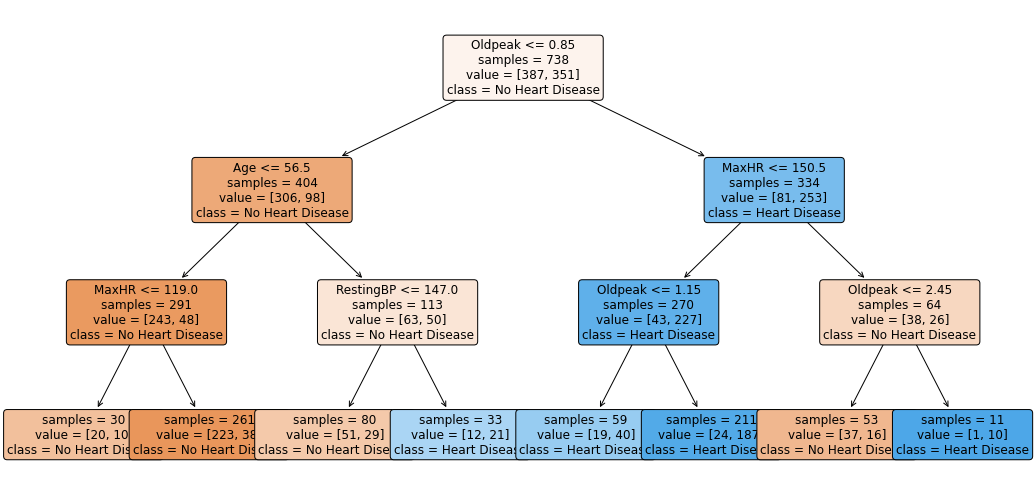

In [29]:
hd_dtree(test_df1)

#### Method 2 - **Label Encoding Ordinal Categorical Data**

Tree Score: 0.8495934959349594


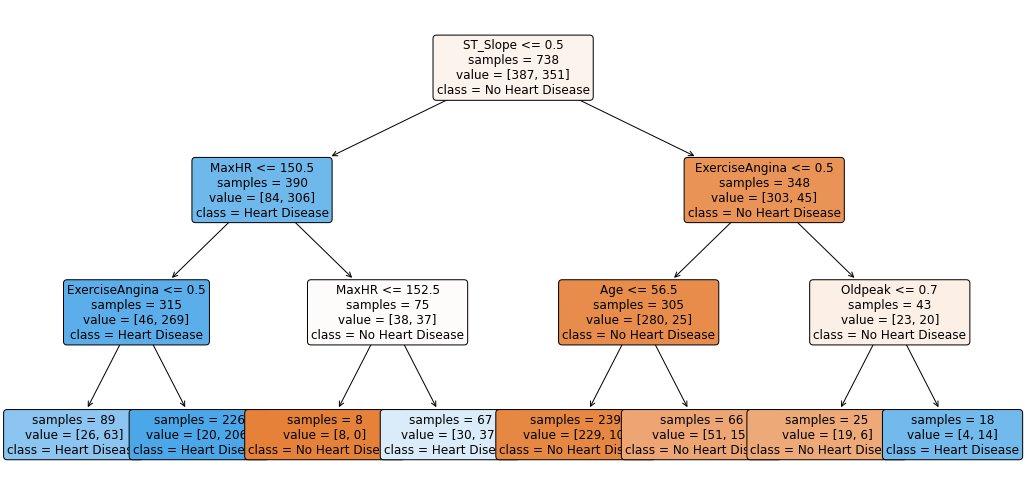

In [30]:
hd_dtree(test_df2)

#### **Method 3 - Combining the Label Encoding with One Hot Encoding of Nominal Categorical Data**

Tree Score: 0.8644986449864499


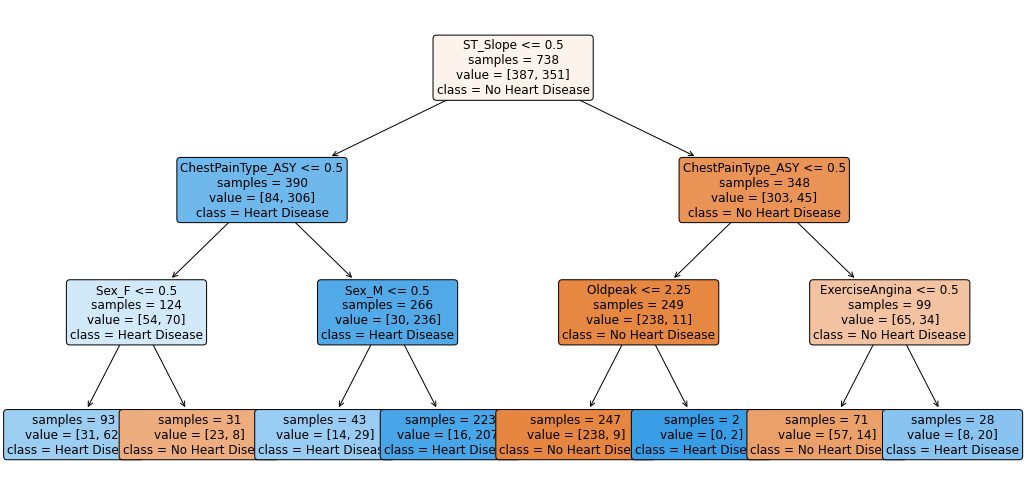

In [31]:
hd_dtree(test_df3)

It appears the third dataframe performs best. The hyperparameters can be tuned for optimal performance.

### Hyperparameter Tuning

In [32]:
#arbitraily choose some hyperparameters to use for tuning
min_samples_split_list_alt = np.arange(2, 150, 10, dtype=int)
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 500]
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

#### Minimum Samples Split

In [33]:
def min_sample_accuracy(min_samples_split_list, X_train, X_test, y_train, y_test):
    accuracy_list_train = []
    accuracy_list_test = []

    for min_samples_split in min_samples_split_list:
        model = tree.DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 42).fit(X_train, y_train)

        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        accuracy_train = metrics.accuracy_score(predictions_train, y_train)
        accuracy_test = metrics.accuracy_score(predictions_test, y_test)
        accuracy_list_train.append(accuracy_train)
        accuracy_list_test.append(accuracy_test)

    plt.title('Train x Test Min Sample Accuracy')
    plt.xlabel('min samples split')
    plt.ylabel('accuracy')
    plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
    plt.plot(accuracy_list_train)
    plt.plot(accuracy_list_test)
    plt.legend(['Train', 'Test'])

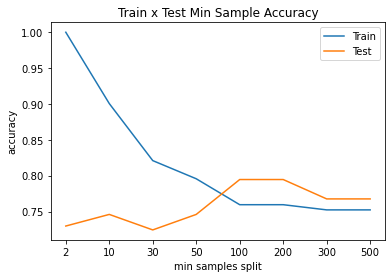

In [34]:
#method 1
min_sample_accuracy(min_samples_split_list, X_train1, X_test1, y_train1, y_test1)

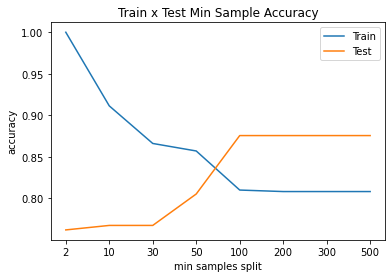

In [35]:
#method 2
min_sample_accuracy(min_samples_split_list, X_train2, X_test2, y_train2, y_test2)

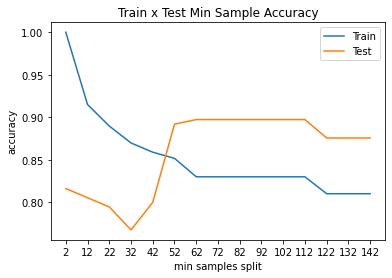

In [36]:
#method 3
min_sample_accuracy(min_samples_split_list_alt, X_train3, X_test3, y_train3, y_test3)

#### Max Depth

In [37]:
def max_depth_accuracy(max_depth_list, X_train, X_test, y_train, y_test):
    accuracy_list_train = []
    accuracy_list_test = []

    for max_depth in max_depth_list:
        model = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = 42).fit(X_train, y_train)

        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        accuracy_train = metrics.accuracy_score(predictions_train, y_train)
        accuracy_test = metrics.accuracy_score(predictions_test, y_test)
        accuracy_list_train.append(accuracy_train)
        accuracy_list_test.append(accuracy_test)

    plt.title('Train x Test Max Depth Accuracy')
    plt.xlabel('max depth')
    plt.ylabel('accuracy')
    plt.xticks(ticks= range(len(max_depth_list)), labels=max_depth_list)
    plt.plot(accuracy_list_train)
    plt.plot(accuracy_list_test)
    plt.legend(['Train', 'Test'])

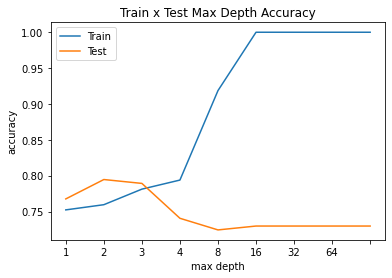

In [38]:
#method 1
max_depth_accuracy(max_depth_list, X_train1, X_test1, y_train1, y_test1)

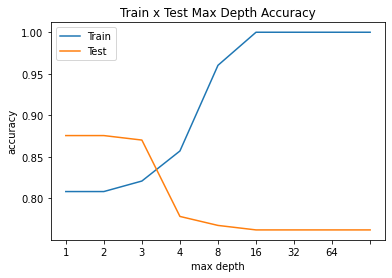

In [39]:
#method 2
max_depth_accuracy(max_depth_list, X_train2, X_test2, y_train2, y_test2)

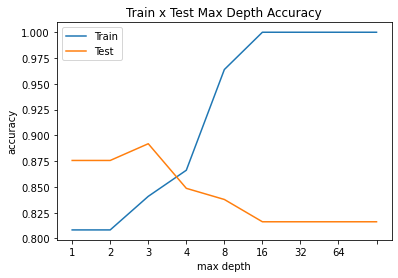

In [40]:
#method 3
max_depth_accuracy(max_depth_list, X_train3, X_test3, y_train3, y_test3)

### Applying Hyperparameter Tuning to Decision Tree Models

In [41]:
#creating a function for the model

def hd_dtree_tuned(dataframe, max_depth, min_samples_split):
    '''
    Returns the tree score and displays a decision tree for predicting heart disease for the dataframe chosen
    '''

    test_features = dataframe.iloc[:, :-1]

    hd_tree = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state = 42)
    hd_tree.fit(test_features, dataframe['HeartDisease'])
    hd_tree.score(test_features, dataframe['HeartDisease'])

    #size of tree plot
    fig, ax = plt.subplots(figsize=(18, 9))

    # Use sklearn's plot_tree() function
    plot_tree(hd_tree,
              feature_names=test_features.columns.tolist(),
              class_names=['No Heart Disease', 'Heart Disease'],
              rounded=True,
              impurity=False,
              filled=True,
              ax=ax,
              fontsize=12)

    print(f"Tree Score: {hd_tree.score(test_features, dataframe['HeartDisease'])}")

    plt.show()

Tree Score: 0.7859078590785907


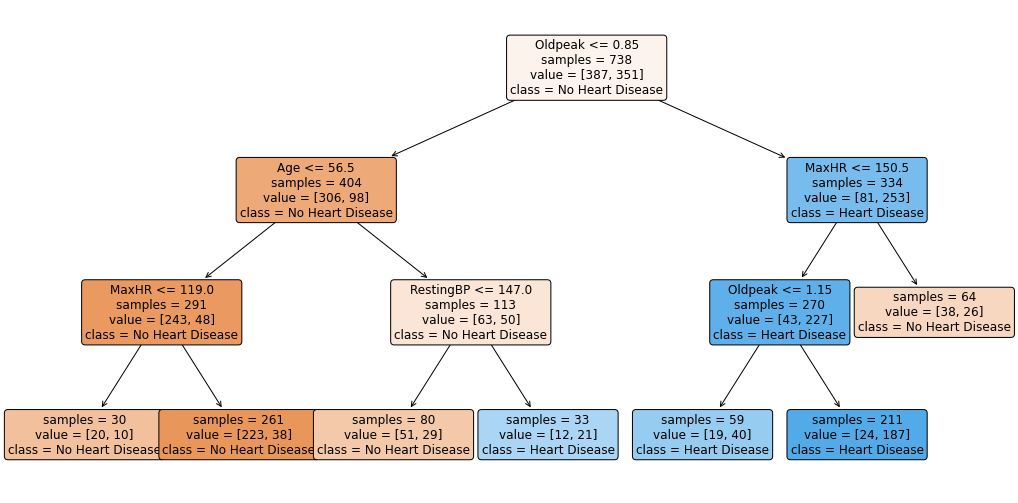

In [42]:
hd_dtree_tuned(test_df1, max_depth=3, min_samples_split=80)

Tree Score: 0.8360433604336044


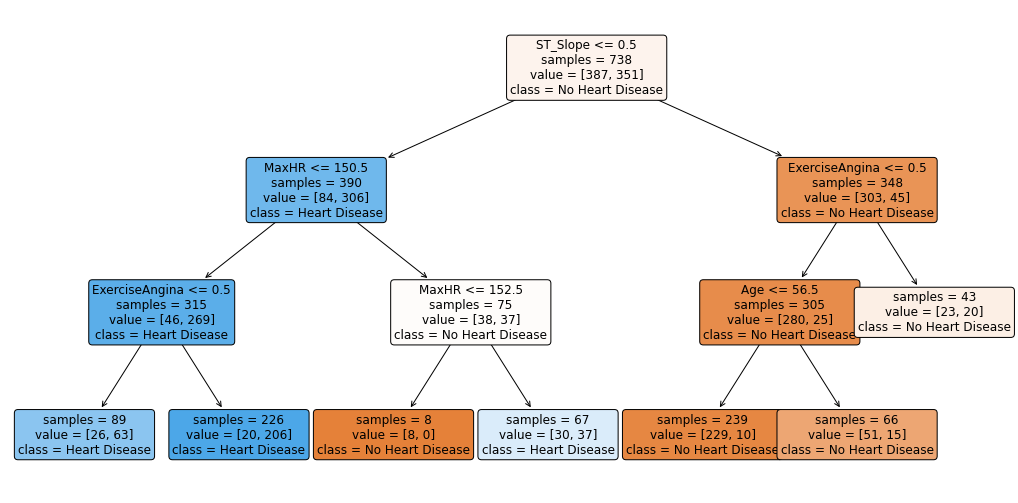

In [43]:
hd_dtree_tuned(test_df2, max_depth=3, min_samples_split=75)

Tree Score: 0.8699186991869918


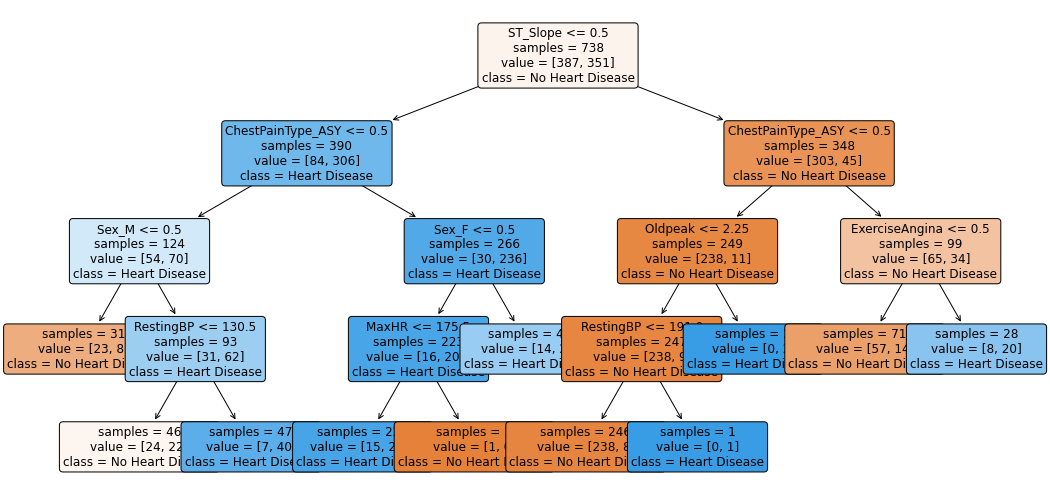

In [44]:
hd_dtree_tuned(test_df3, max_depth=4, min_samples_split=75)

## **Model Evaluation**

In [45]:
def HDTree_model_accuracy(X_train, X_test, y_train, y_test, max_depth, min_samples_split):
    HDtree = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    HDtree.fit(X_train, y_train)

    # use the model to predict the test_encoded data
    test_pred_class = HDtree.predict(X_test)

    print(f"Model Accuracy: {metrics.accuracy_score(y_test, test_pred_class)}")

In [46]:
#method 1
HDTree_model_accuracy(X_train1, X_test1, y_train1, y_test1, max_depth=3, min_samples_split=80)

Model Accuracy: 0.7891891891891892


In [47]:
#method 2
HDTree_model_accuracy(X_train2, X_test2, y_train2, y_test2, max_depth=3, min_samples_split=75)

Model Accuracy: 0.8756756756756757


In [48]:
#method 3
HDTree_model_accuracy(X_train3, X_test3, y_train3, y_test3, max_depth=4, min_samples_split=75)

Model Accuracy: 0.8972972972972973


## Conclusion

The third method (combining label encoding for the ordinal variables and one hot encoding for nominal variables) has the highest decision tree accuracy value (89.7%)

## Limitations
- The dataset is probably too small
- Sex could probably have played a bigger role than could be observed
- A random forest could yield a better model